In [2]:
import json

id = '0001'

with open(f'dataset/train/{id}.json', 'r') as f:
    data = json.load(f)

corners = data['corners']
pieces = data['pieces']

print(data)
print(f'Corners: {corners}')
print(f'Pieces: {pieces}')

{'fen': 'r2q1rk1/pp2npbp/3p1np1/P2pp3/2P1P1b1/2N2NP1/1P3PBP/R1BQ1RK1', 'white_turn': True, 'camera': {'angle': 59, 'location': [-0.003925641067326069, -0.20395508408546448, 0.339438259601593]}, 'lighting': {'mode': 'flash', 'flash': {'active': True}, 'spot1': {'active': False, 'xy_angle': 227, 'focus': [0.007569871377199888, -0.04214673489332199, 0.0], 'location': [-0.24551941454410553, -0.26328733563423157, 0.19370906054973602]}, 'spot2': {'active': False, 'xy_angle': 92, 'focus': [-0.5286591649055481, 0.1900937259197235, 0.0], 'location': [-0.01256381906569004, 0.3597806990146637, 0.3589327335357666]}}, 'corners': [[255, 698], [353, 187], [836, 180], [956, 684]], 'pieces': [{'piece': 'k', 'square': 'g8', 'box': [725, 115, 55, 107]}, {'piece': 'r', 'square': 'f8', 'box': [681, 138, 44, 79]}, {'piece': 'q', 'square': 'd8', 'box': [535, 119, 43, 102]}, {'piece': 'r', 'square': 'a8', 'box': [335, 149, 55, 79]}, {'piece': 'p', 'square': 'h7', 'box': [803, 212, 34, 49]}, {'piece': 'b', 'sq

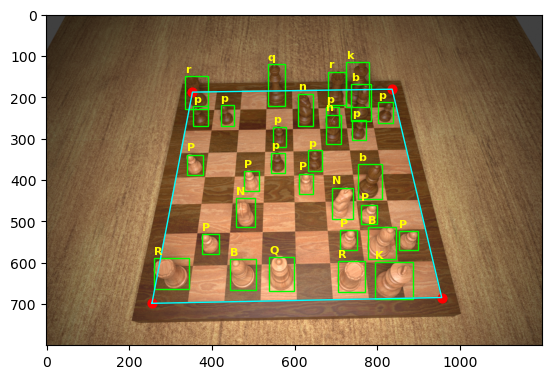

In [4]:
from PIL import Image

img = Image.open(f'dataset/train/{id}.png')

import matplotlib.pyplot as plt

plt.imshow(img)
x, y = zip(*corners)
plt.plot(x + (x[0],), y + (y[0],), color='cyan', linewidth=1)  # connect corners in order and close the box
plt.scatter(x, y, c='red', s=40)

for piece in pieces:
    box = piece['box']  # box is [x_min, y_min, x_max, y_max]
    rect = plt.Rectangle((box[0], box[1]), box[2], box[3],
                         linewidth=1, edgecolor='lime', facecolor='none')
    plt.text(box[0], box[1] - 5, f"{piece['piece']}", color='yellow', fontsize=8, ha='left', va='bottom', weight='bold')
    plt.gca().add_patch(rect)
    

plt.savefig(f'/tmp/img.png', bbox_inches='tight', dpi=300)
plt.show()

